In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
wine=pd.read_csv("winequality-white.csv",sep=';')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wine.shape

(4898, 12)

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:

wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [7]:
# to find null values
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# drop null values
wine.dropna(inplace=True)

In [9]:
wine.shape

(4898, 12)

In [10]:
wine.drop_duplicates(inplace=True)

In [11]:
#wine.drop(columns="type",inplace=True)

In [12]:
wine.shape

(3961, 12)

In [13]:
correlation=wine.corr()

Pearson correlation: The Pearson correlation is the most commonly used measurement for a linear relationship between two variables. The stronger the correlation between these two datasets, the closer it'll be to +1 or -1.

<AxesSubplot:>

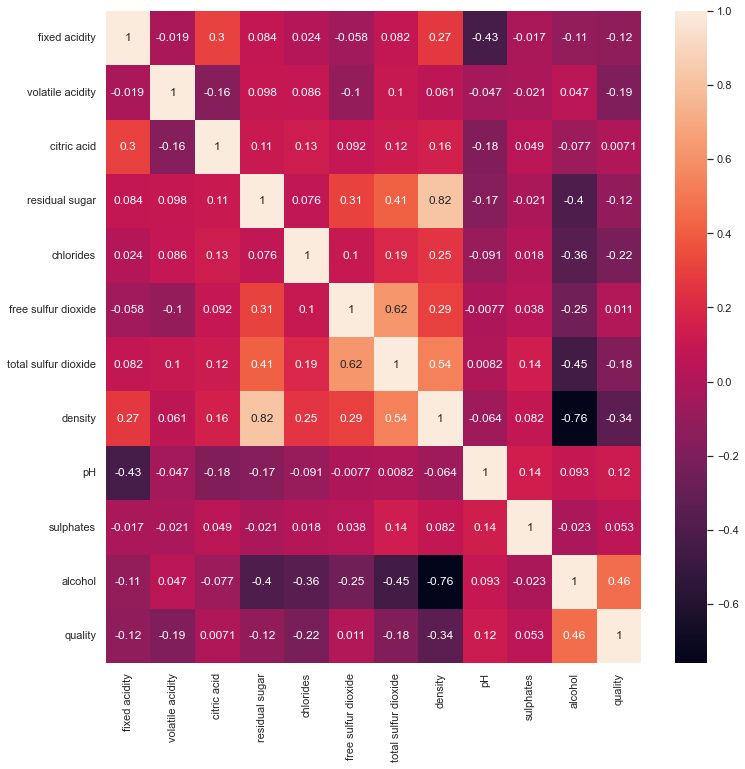

In [14]:

sns.set(rc={"figure.figsize":(12, 12)}) #width=3, #height=4
sns.heatmap(correlation,annot=True)

# Observation :- total sulfur dioxide and free sulfur dioxide are positive correlated

In [15]:
wine.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

In [16]:
wine.quality.value_counts() # Quality :- 0,1,2 and 10 not present

6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: quality, dtype: int64

<BarContainer object of 7 artists>

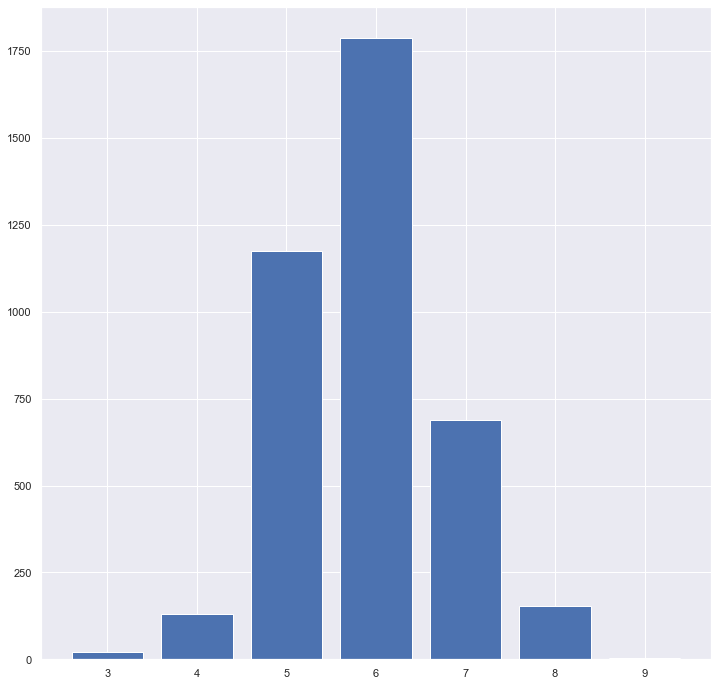

In [17]:
plt.bar(wine.quality.unique(),wine.quality.value_counts())

# Replacement of quality score with low,medium, high

group_Qulaity={3:"low" , 4: "low" , 5: "low" , 6: "medium" ,7: "high" , 8: "high" , 9: "high" }
wine["quality"]=wine["quality"].replace(group_Qulaity)

In [18]:
bins = (2,6,9)
group_names = ['low','high']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

<BarContainer object of 2 artists>

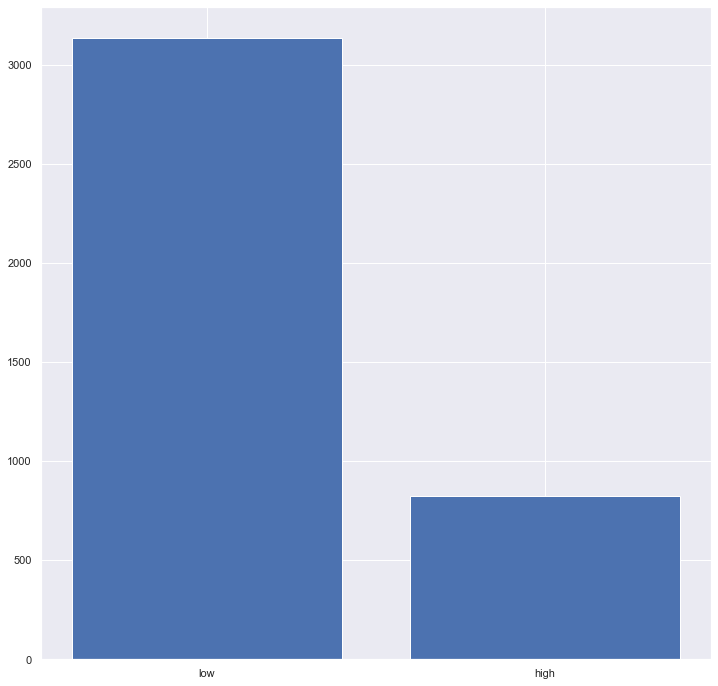

In [19]:
plt.bar(wine.quality.unique(),wine.quality.value_counts())

In [20]:
wine.quality.value_counts()

low     3136
high     825
Name: quality, dtype: int64

In [21]:
# For wine Quality - Label encoding
# label encode the target variable
wine.quality = LabelEncoder().fit_transform(wine.quality)

In [22]:
wine.quality.unique()

array([1, 0])

In [23]:
# Input
X=wine.drop("quality",axis=1)

# Output
y=wine.quality

# Dealing with Outliers
fixed acidity	residual sugar, free sulfur dioxide	total sulfur dioxide	

Text(0.5, 0, 'Fixed acidity')

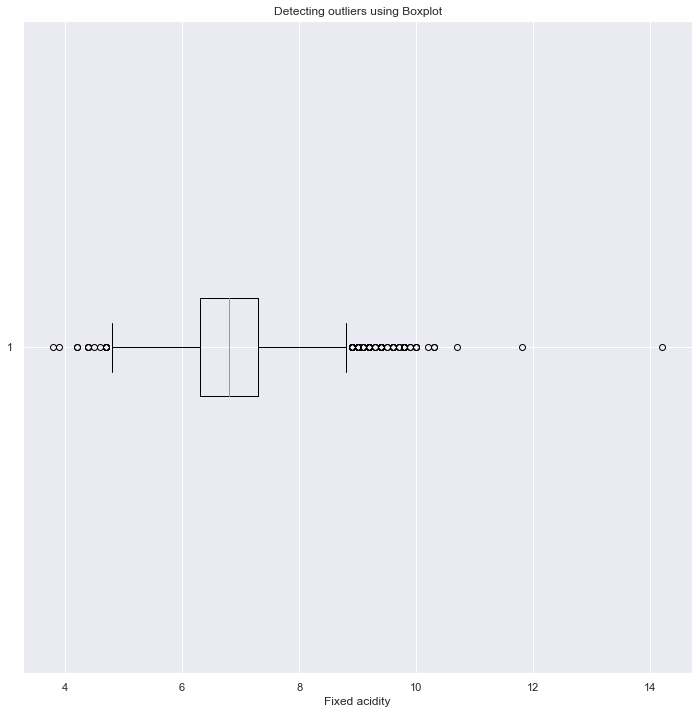

In [24]:
# Before handling Outliers
plt.boxplot(X["fixed acidity"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Fixed acidity')

In [25]:
X["fixed acidity"].quantile(0.25),X["fixed acidity"].quantile(0.75)
IQR=X["fixed acidity"].quantile(0.75)-X["fixed acidity"].quantile(0.25)
print("IQR :",IQR)

# whisker values
Q1=X["fixed acidity"].quantile(0.25)
Q3=X["fixed acidity"].quantile(0.75)
print("Q1 and Q3 : ",Q1,Q3)
whisker_value1=Q1-(1.5*IQR)
whisker_value2=Q3+(1.5*IQR)

print("whisker 1 and whisker 2 :",whisker_value1,whisker_value2)

X["fixed acidity"].loc[X["fixed acidity"]<4.8]=Q1

X["fixed acidity"].loc[X["fixed acidity"]>8.8]=Q3

IQR : 1.0
Q1 and Q3 :  6.3 7.3
whisker 1 and whisker 2 : 4.8 8.8


Text(0.5, 0, 'Fixed acidity')

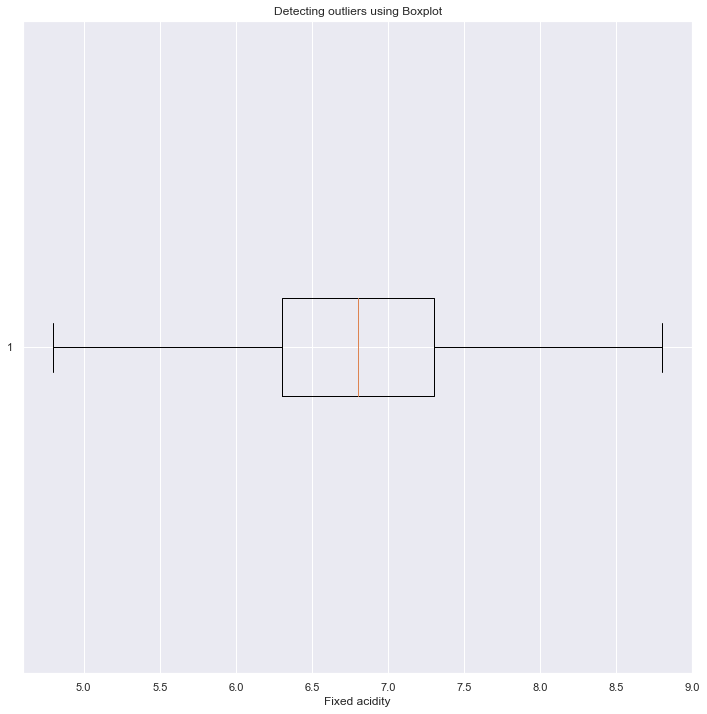

In [26]:
# After handling Outliers
plt.boxplot(X["fixed acidity"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Fixed acidity')

Text(0.5, 0, 'Residual Sugar')

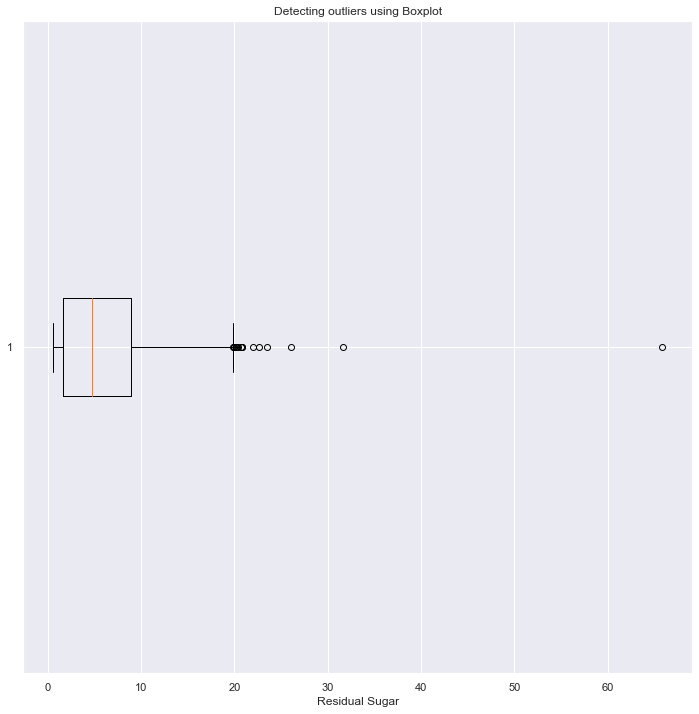

In [27]:
# Before handling Outliers
plt.boxplot(X["residual sugar"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Residual Sugar')

In [28]:
X["residual sugar"].quantile(0.25),X["residual sugar"].quantile(0.75)
IQR=X["residual sugar"].quantile(0.75)-X["residual sugar"].quantile(0.25)
print("IQR :",IQR)

# whisker values
Q1=X["residual sugar"].quantile(0.25)
Q3=X["residual sugar"].quantile(0.75)
print("Q1 and Q3 : ",Q1,Q3)
whisker_value1=Q1-(1.5*IQR)
whisker_value2=Q3+(1.5*IQR)

print("whisker 1 and whisker 2 :",whisker_value1,whisker_value2)

X["residual sugar"].loc[X["residual sugar"]<-9.35]=Q1

X["residual sugar"].loc[X["residual sugar"]>19.85]=Q3

IQR : 7.300000000000001
Q1 and Q3 :  1.6 8.9
whisker 1 and whisker 2 : -9.350000000000001 19.85


Text(0.5, 0, 'Residual Sugar')

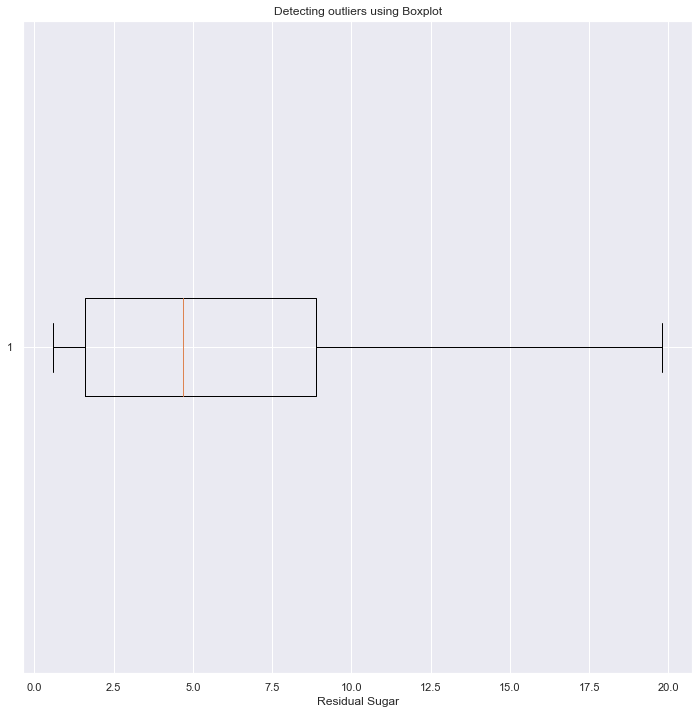

In [29]:
# After handling Outliers
plt.boxplot(X["residual sugar"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Residual Sugar')

Text(0.5, 0, 'Total sulfur dioxide')

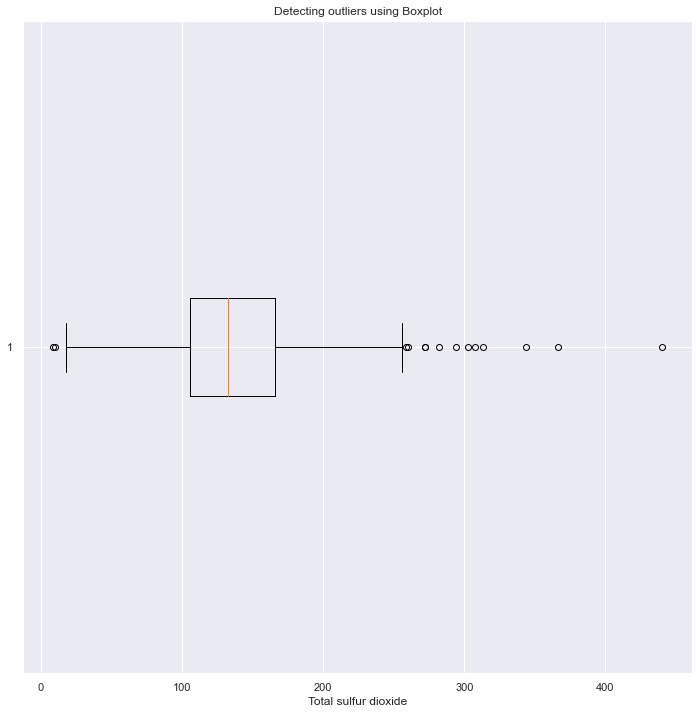

In [30]:
# Before handling Outliers
plt.boxplot(X["total sulfur dioxide"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Total sulfur dioxide')

In [31]:
X["total sulfur dioxide"].quantile(0.25),X["total sulfur dioxide"].quantile(0.75)
IQR=X["total sulfur dioxide"].quantile(0.75)-X["total sulfur dioxide"].quantile(0.25)
print("IQR :",IQR)

# whisker values
Q1=X["total sulfur dioxide"].quantile(0.25)
Q3=X["total sulfur dioxide"].quantile(0.75)
print("Q1 and Q3 : ",Q1,Q3)
whisker_value1=Q1-(1.5*IQR)
whisker_value2=Q3+(1.5*IQR)

print("whisker 1 and whisker 2 :",whisker_value1,whisker_value2)

X["total sulfur dioxide"].loc[X["total sulfur dioxide"]<16.0]=Q1

X["total sulfur dioxide"].loc[X["total sulfur dioxide"]>256.0]=Q3

IQR : 60.0
Q1 and Q3 :  106.0 166.0
whisker 1 and whisker 2 : 16.0 256.0


Text(0.5, 0, 'Total sulfur dioxide')

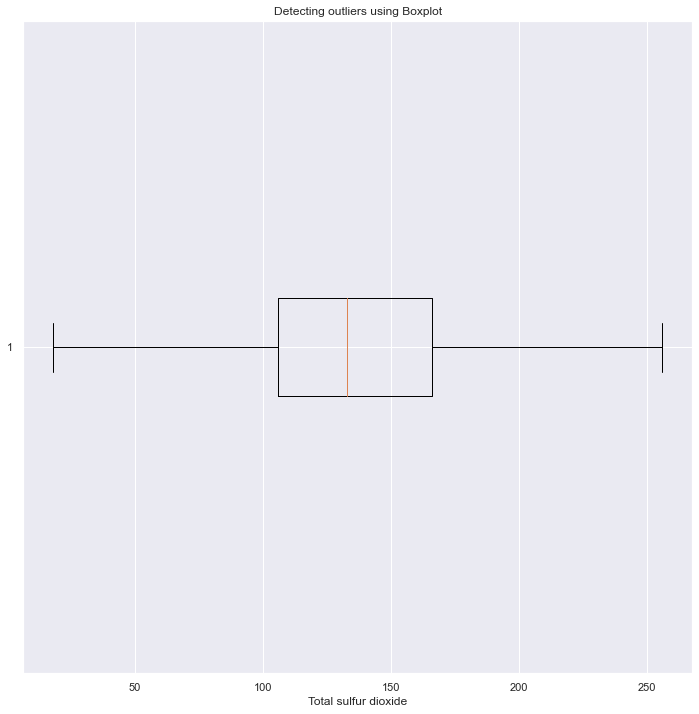

In [32]:
# After handling Outliers
plt.boxplot(X["total sulfur dioxide"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Total sulfur dioxide')

Text(0.5, 0, 'Free sulfur dioxide')

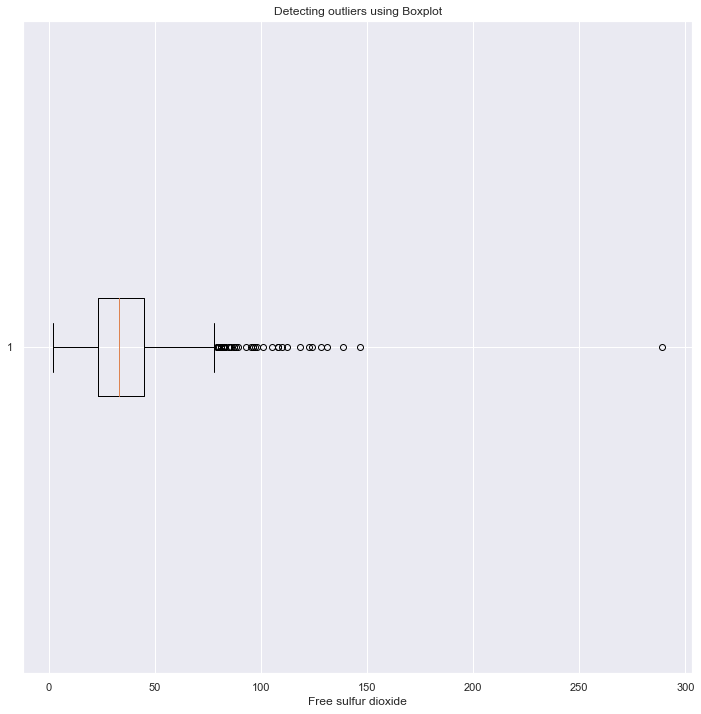

In [33]:
# Before handling Outliers
plt.boxplot(X["free sulfur dioxide"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Free sulfur dioxide')

In [34]:
X["free sulfur dioxide"].quantile(0.25),X["free sulfur dioxide"].quantile(0.75)
IQR=X["free sulfur dioxide"].quantile(0.75)-X["free sulfur dioxide"].quantile(0.25)
print("IQR :",IQR)

# whisker values
Q1=X["free sulfur dioxide"].quantile(0.25)
Q3=X["free sulfur dioxide"].quantile(0.75)
print("Q1 and Q3 : ",Q1,Q3)
whisker_value1=Q1-(1.5*IQR)
whisker_value2=Q3+(1.5*IQR)

print("whisker 1 and whisker 2 :",whisker_value1,whisker_value2)

X["free sulfur dioxide"].loc[X["free sulfur dioxide"]<-10]=Q1

X["free sulfur dioxide"].loc[X["free sulfur dioxide"]>78]=Q3

IQR : 22.0
Q1 and Q3 :  23.0 45.0
whisker 1 and whisker 2 : -10.0 78.0


Text(0.5, 0, 'Free sulfur dioxide')

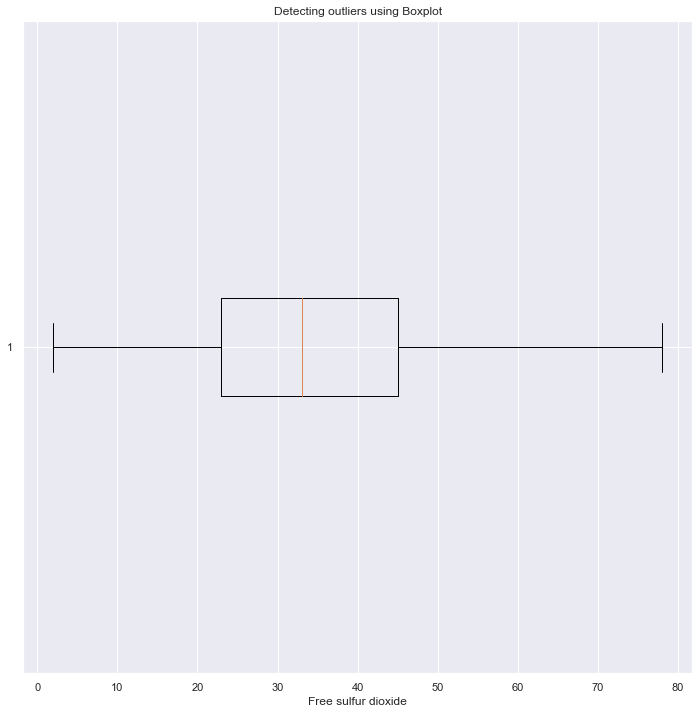

In [35]:
# After handling Outliers
plt.boxplot(X["free sulfur dioxide"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Free sulfur dioxide')

Text(0.5, 0, 'volatile acidity')

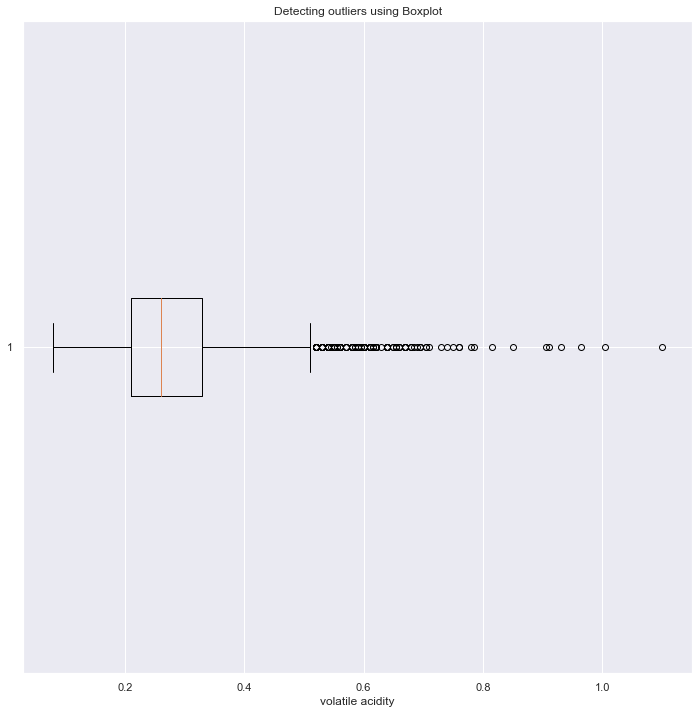

In [36]:
# Before handling Outliers
plt.boxplot(X["volatile acidity"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('volatile acidity')

In [37]:
X["volatile acidity"].quantile(0.25),X["volatile acidity"].quantile(0.75)
IQR=X["volatile acidity"].quantile(0.75)-X["volatile acidity"].quantile(0.25)
print("IQR :",IQR)

# whisker values
Q1=X["volatile acidity"].quantile(0.25)
Q3=X["volatile acidity"].quantile(0.75)
print("Q1 and Q3 : ",Q1,Q3)
whisker_value1=Q1-(1.5*IQR)
whisker_value2=Q3+(1.5*IQR)

print("whisker 1 and whisker 2 :",whisker_value1,whisker_value2)

IQR : 0.12000000000000002
Q1 and Q3 :  0.21 0.33
whisker 1 and whisker 2 : 0.029999999999999943 0.51


In [38]:
X["volatile acidity"].loc[X["volatile acidity"]<0.03]=Q1

X["volatile acidity"].loc[X["volatile acidity"]>0.51]=Q3

Text(0.5, 0, 'volatile acidity')

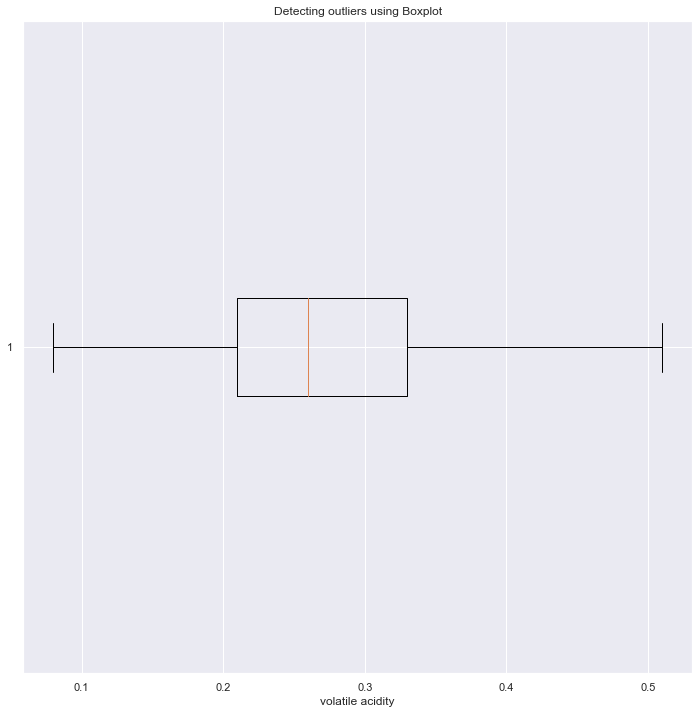

In [39]:
# After handling Outliers
plt.boxplot(X["volatile acidity"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('volatile acidity')

Text(0.5, 0, 'chlorides')

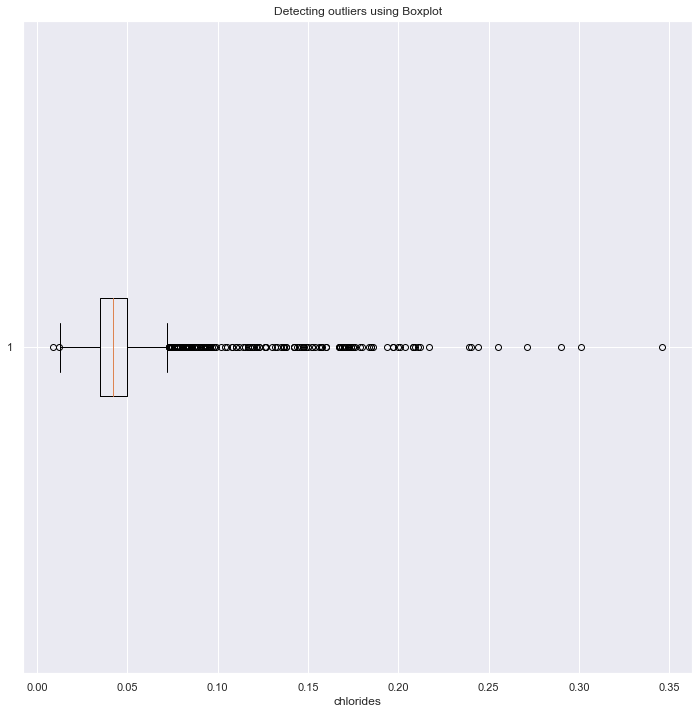

In [40]:
# Before handling Outliers
plt.boxplot(X["chlorides"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('chlorides')

In [41]:
X["chlorides"].quantile(0.25),X["chlorides"].quantile(0.75)
IQR=X["chlorides"].quantile(0.75)-X["chlorides"].quantile(0.25)
print("IQR :",IQR)

# whisker values
Q1=X["chlorides"].quantile(0.25)
Q3=X["chlorides"].quantile(0.75)
print("Q1 and Q3 : ",Q1,Q3)
whisker_value1=Q1-(1.5*IQR)
whisker_value2=Q3+(1.5*IQR)

print("whisker 1 and whisker 2 :",whisker_value1,whisker_value2)

IQR : 0.015
Q1 and Q3 :  0.035 0.05
whisker 1 and whisker 2 : 0.012500000000000004 0.07250000000000001


In [42]:
X["chlorides"].loc[X["chlorides"]<0.0125]=Q1

X["chlorides"].loc[X["chlorides"]>0.072]=Q3

Text(0.5, 0, 'chlorides')

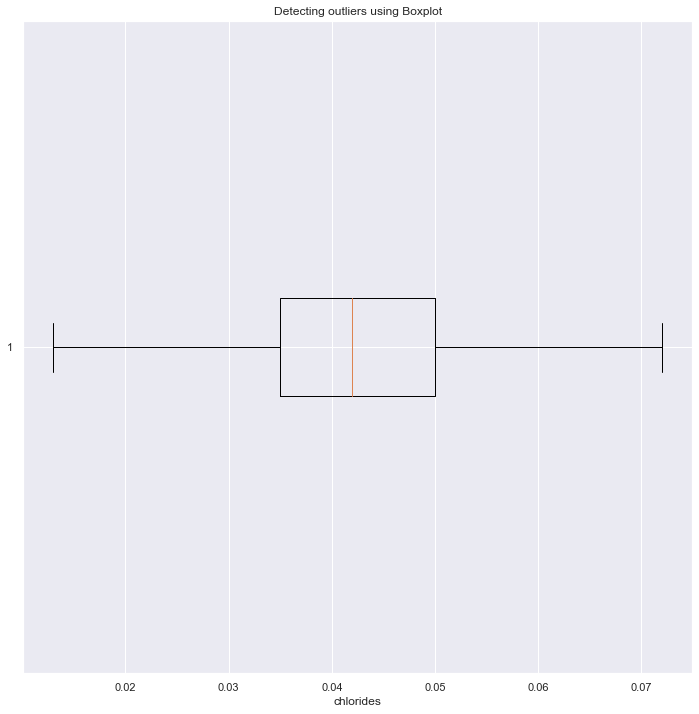

In [43]:
# After handling Outliers
plt.boxplot(X["chlorides"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('chlorides')

# Balanced target variable y
(unique,count)=np.unique(y,return_counts=True)
frequencies=np.asarray((unique,count)).T
print(frequencies)

# Split data in Training and test data

In [44]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


# SMOTE - Class Imbalance

from collections import Counter
# check version number
import imblearn
from imblearn.over_sampling import SMOTE
print("The number of classes before fit {}".format(Counter(y_train)))
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
print("The number of classes after fit {}".format(Counter(y_train)))

# lets plot SMOTE
pd.value_counts(y_train).plot.bar()
plt.title("SMOTE- Class Balance")
plt.xlabel("Class")
plt.ylabel("Frequency")
pd.value_counts(y_train)
#oversample.plt.bar(X_train, Counter(y_train))

# Feature Selection

In [45]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif


In [46]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info=mutual_info_classif(X_train,y_train)
mutual_info
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns 
mutual_info.sort_values(ascending=False)

alcohol                 0.092958
density                 0.059536
chlorides               0.051297
total sulfur dioxide    0.033445
residual sugar          0.023195
pH                      0.018589
free sulfur dioxide     0.017664
sulphates               0.014777
citric acid             0.012847
fixed acidity           0.000000
volatile acidity        0.000000
dtype: float64

<AxesSubplot:>

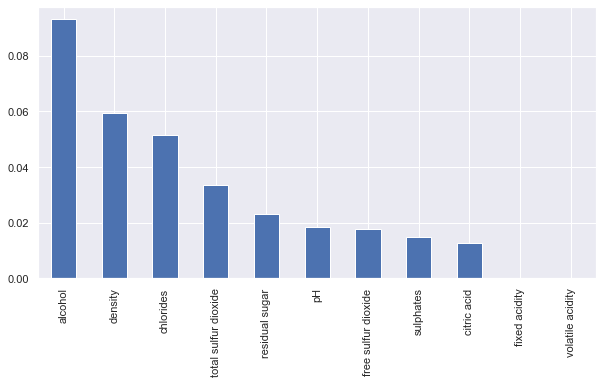

In [47]:
# lets plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(10,5))

In [48]:
fs = SelectKBest(score_func=mutual_info_classif, k=7) # f_classif
# apply feature selection
print(fs)
X_train = fs.fit_transform(X_train, y_train)
print(X_train.shape)

SelectKBest(k=7, score_func=<function mutual_info_classif at 0x7fe81bdf04c0>)
(3168, 7)


In [49]:
# ANOVA correlation coefficient (linear) -Selected top 5 important features
X_train[0:5]
# type	volatile acidity	chlorides	density	alcohol

array([[7.0000e+00, 4.9000e-01, 3.8000e+00, 4.7000e-02, 1.3600e+02,
        9.9380e-01, 9.4000e+00],
       [6.1000e+00, 4.7000e-01, 1.4000e+00, 4.9000e-02, 1.8700e+02,
        9.9270e-01, 9.5000e+00],
       [7.6000e+00, 4.2000e-01, 1.5000e+00, 4.4000e-02, 1.1400e+02,
        9.9140e-01, 1.2800e+01],
       [5.5000e+00, 3.1000e-01, 1.2000e+00, 2.6000e-02, 6.8000e+01,
        9.8980e-01, 1.1650e+01],
       [7.1000e+00, 3.9000e-01, 1.4500e+01, 5.1000e-02, 1.5600e+02,
        9.9947e-01, 9.1000e+00]])

# Feature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler=StandardScaler()
#scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_train[0:5]

array([[ 2.76382755e-01,  1.26770728e+00, -4.34034928e-01,
         4.67436985e-01,  6.76421306e-04,  5.88320722e-03,
        -9.81623739e-01],
       [-9.21037866e-01,  1.10440485e+00, -9.50762431e-01,
         6.68215288e-01,  1.22177181e+00, -3.69435796e-01,
        -8.99266153e-01],
       [ 1.07466317e+00,  6.96148775e-01, -9.29232118e-01,
         1.66269532e-01, -5.26070610e-01, -8.12994617e-01,
         1.81853418e+00],
       [-1.71931828e+00, -2.02014591e-01, -9.93823056e-01,
        -1.64073519e+00, -1.62745077e+00, -1.35891317e+00,
         8.71421941e-01],
       [ 4.09429490e-01,  4.51195130e-01,  1.86970852e+00,
         8.68993590e-01,  4.79537359e-01,  1.94048207e+00,
        -1.22869650e+00]])

# Model Creation using Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB
#from sklearn.naive_bayes importMultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score
from sklearn.metrics import f1_score, classification_report

In [53]:
gnb = GaussianNB()
#gnb =MultinomialNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [54]:
print("Training Accuracy :",gnb.score(X_train, y_train))

Training Accuracy : 0.7541035353535354


In [55]:
# Feature Selection 
X_test = fs.transform(X_test)
print(X_test.shape)

(793, 7)


In [56]:
# Feature Scaling on X_test
X_test=scaler.transform(X_test)
X_test

array([[ 0.54247623,  1.10440485, -0.15414086, ..., -1.69927991,
        -0.94947425,  1.65381901],
       [ 0.67552296,  0.94110242, -0.99382306, ..., -1.84293819,
        -0.40355571,  0.17138246],
       [ 0.54247623,  3.30898766,  1.43910227, ...,  0.47953736,
         1.47303931, -1.55812684],
       ...,
       [-1.98541175, -0.03871216, -0.97229274, ..., -0.93310241,
        -1.08595389,  0.33609763],
       [ 0.01028928, -0.03871216, -1.10147462, ..., -1.67533686,
        -1.32479326,  0.99495832],
       [ 0.94161643,  0.36954391, -1.01535337, ..., -0.76550108,
        -0.90853036,  0.99495832]])

In [57]:
y_pred_gnb = gnb.predict(X_test)
#y_prob_pred_gnb = gnb.predict_proba(X_test)
# how did our model perform?
#count_misclassified = (y_test != y_pred_gnb).sum()

print("GaussianNB")
#print("=" * 30)
#print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_pred_gnb)
print('Accuracy: {:.2f}'.format(accuracy))

GaussianNB
Accuracy: 0.77


In [58]:
#Recall, Precision, and F1 score for GaussianNB

print("Recall score : ", recall_score(y_test, y_pred_gnb , average='micro'))
print("Precision score : ",precision_score(y_test, y_pred_gnb , average='micro'))
print("F1 score : ",f1_score(y_test, y_pred_gnb , average='micro'))

Recall score :  0.7654476670870114
Precision score :  0.7654476670870114
F1 score :  0.7654476670870113


In [59]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)
print('Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))
y_pred_rand=forest.predict(X_test)
print('Random Forest Classifier Testing Accuracy:', forest.score(X_test, y_test))
accuracy = accuracy_score(y_test, y_pred_rand)
print(accuracy)

Random Forest Classifier Training Accuracy: 0.9911616161616161
Random Forest Classifier Testing Accuracy: 0.8171500630517023
0.8171500630517023


In [60]:
#classification_report for GaussianNB

print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.48      0.62      0.54       175
           1       0.88      0.81      0.84       618

    accuracy                           0.77       793
   macro avg       0.68      0.71      0.69       793
weighted avg       0.79      0.77      0.78       793



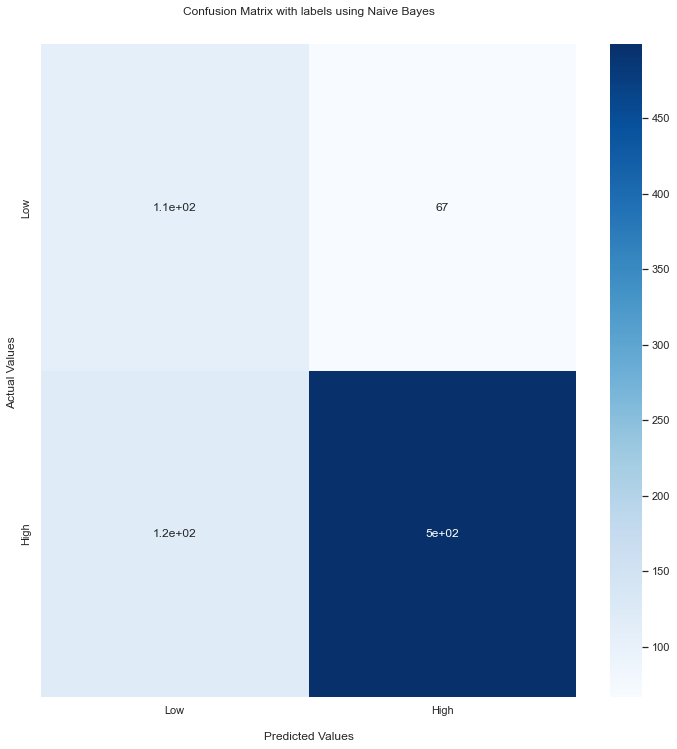

In [61]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_gnb)

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels using Naive Bayes\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Low','High'])
ax.yaxis.set_ticklabels(['Low','High'])

## Display the visualization of the Confusion Matrix.
plt.show()

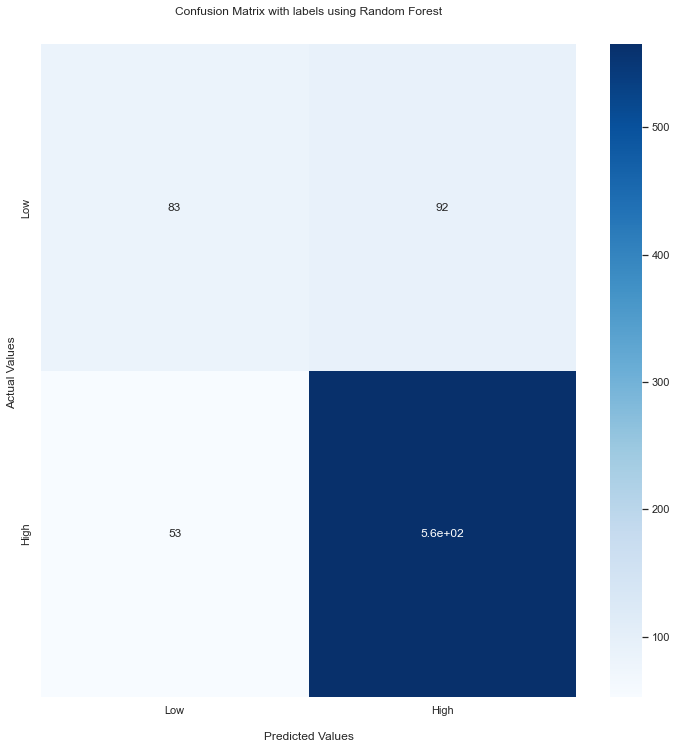

In [62]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rand)

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels using Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Low','High'])
ax.yaxis.set_ticklabels(['Low','High'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [63]:
#classification_report for GaussianNB

print(classification_report(y_test, y_pred_rand))

              precision    recall  f1-score   support

           0       0.61      0.47      0.53       175
           1       0.86      0.91      0.89       618

    accuracy                           0.82       793
   macro avg       0.74      0.69      0.71       793
weighted avg       0.80      0.82      0.81       793

